In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Analyse globale 2015-2025

In [26]:
# Analyse globale 2015-2025
# Téléchargement des données 2015-2025

tickers = ["MC.PA", "^FCHI"]

data = yf.download(tickers, start="2015-01-01")
data = data["Close"].dropna()

returns = data.pct_change().dropna()

returns.columns = ["LVMH", "CAC 40"]

returns

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  2 of 2 completed


,LVMH,CAC 40
Date,,
2015-01-05,-0.029041,-0.033142
2015-01-06,-0.011413,-0.006776
2015-01-07,0.000796,0.007158
2015-01-08,0.031424,0.035855
2015-01-09,-0.015040,-0.019041
...,...,...
2026-02-13,-0.019638,-0.003455
2026-02-16,0.007974,0.000573
2026-02-17,0.018136,0.005406


In [27]:
# Calcul des rendements journaliers

returns = data.pct_change().dropna()

returns.head()

Ticker,MC.PA,^FCHI
Date,,
2015-01-05,-0.029041,-0.033142
2015-01-06,-0.011413,-0.006776
2015-01-07,0.000796,0.007158
2015-01-08,0.031424,0.035855
2015-01-09,-0.015040,-0.019041


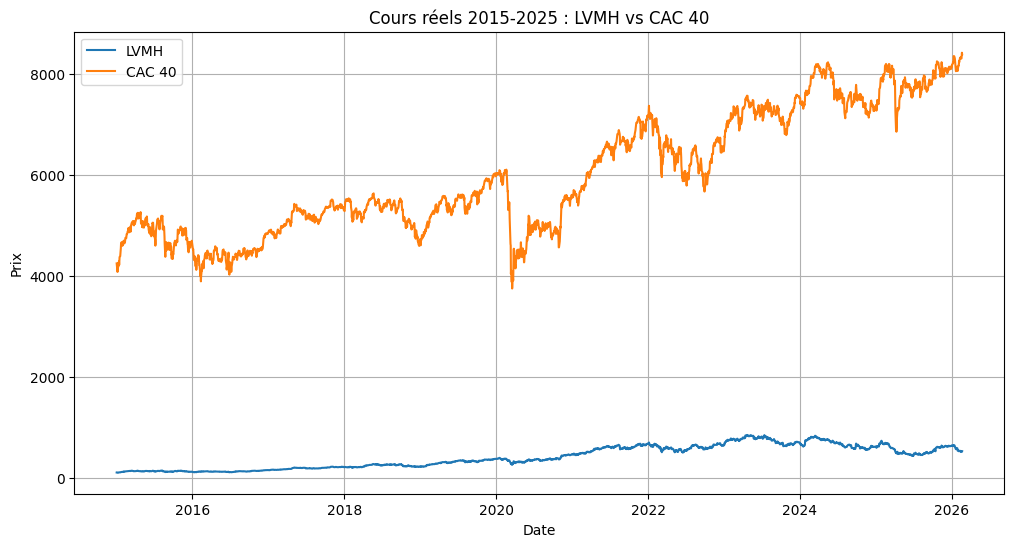

In [28]:
# Cours LVMH & CAC40

plt.figure(figsize=(12,6))

plt.plot(data.index, data['MC.PA'], label='LVMH')
plt.plot(data.index, data['^FCHI'], label='CAC 40')

plt.title("Cours réels 2015-2025 : LVMH vs CAC 40")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)

plt.show()

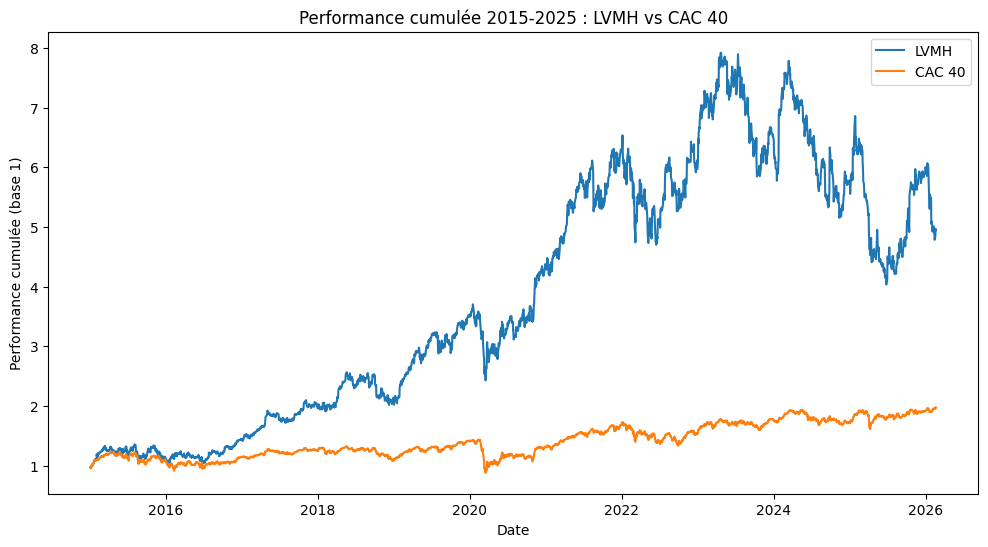

In [29]:
# Performance Cumulée 
rendements = data.pct_change().dropna()
performance_cumulee = (1 + rendements).cumprod()
performance_cumulee.columns = ['LVMH', 'CAC40']
plt.figure(figsize=(12,6))

plt.plot(performance_cumulee.index, performance_cumulee['LVMH'], label='LVMH')
plt.plot(performance_cumulee.index, performance_cumulee['CAC40'], label='CAC 40')

plt.title("Performance cumulée 2015-2025 : LVMH vs CAC 40")
plt.xlabel("Date")
plt.ylabel("Performance cumulée (base 1)")
plt.legend()
plt.show()

In [30]:
total_performance = performance_cumulee.iloc[-1] - 1
total_performance * 100

LVMH     394.632532
CAC40     97.511933
Name: 2026-02-19 00:00:00, dtype: float64

In [31]:
# Rendements annualisés
annual_return = returns.mean() * 252

annual_return_table = pd.DataFrame({
    "Rendement annualisé (%)": annual_return * 100
})
print("Tableau comparatif du rendement annualisé :")
annual_return_table.index = ["LVMH", "CAC 40"]
annual_return_table.round(2)

Tableau comparatif du rendement annualisé :


,Rendement annualisé (%)
LVMH,18.11
CAC 40,7.72


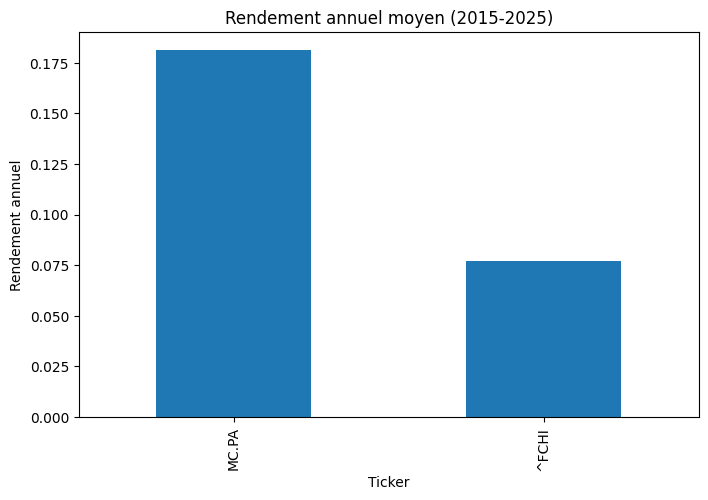

In [32]:
import matplotlib.pyplot as plt

mean_returns = returns.mean() * 252  # annualisé

plt.figure(figsize=(8,5))
mean_returns.plot(kind='bar')
plt.title("Rendement annuel moyen (2015-2025)")
plt.ylabel("Rendement annuel")
plt.show()

In [33]:
# Volatilité annualisé

volatility = returns.std() * np.sqrt(252)

volatility_table = pd.DataFrame({
    "Volatilité annualisée (%)": volatility * 100
})
print("Tableau comparatif de la volatilité annualisé :")
volatility_table.index = ["LVMH", "CAC 40"]
volatility_table.round(2)

Tableau comparatif de la volatilité annualisé :


,Volatilité annualisée (%)
LVMH,28.22
CAC 40,18.37


In [34]:
# Ratio de Sharpe

risk_free_rate = 0.02

sharpe = (annual_return - risk_free_rate) / volatility

sharpe_table = pd.DataFrame({
    "Ratio de Sharpe": sharpe
})

sharpe_table.index = ["LVMH", "CAC 40"]
sharpe_table.round(2)

,Ratio de Sharpe
LVMH,0.57
CAC 40,0.31


In [35]:
# Max Drawdown
def max_drawdown(r):
    cumulative = (1 + r).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

max_dd = returns.apply(max_drawdown)

drawdown_table = pd.DataFrame({
    "Max Drawdown (%)": max_dd * 100
})

drawdown_table.index = ["LVMH", "CAC 40"]
drawdown_table.round(2)

,Max Drawdown (%)
LVMH,-49.03
CAC 40,-38.56


In [36]:
# Tableau comparatif global

summary_table = pd.DataFrame({
    "Volatilité annualisée (%)": volatility * 100,
    "Ratio de Sharpe": sharpe,
    "Max Drawdown (%)": max_dd * 100
})
print("Tableau comparatif global :")
summary_table.index = ["LVMH", "CAC 40"]
summary_table.round(2)

Tableau comparatif global :


,Volatilité annualisée (%),Ratio de Sharpe,Max Drawdown (%)
LVMH,28.22,0.57,-49.03
CAC 40,18.37,0.31,-38.56


Analyse Avant/Après Covid

In [37]:
# Analyse Avant/Après Covid
# Périodes
avant_covid = returns.loc["2015-01-01":"2019-12-31"]
apres_covid = returns.loc["2020-01-01":]

In [38]:
# Rendement annualisé
annual_return_avant = avant_covid.mean() * 252
annual_return_apres = apres_covid.mean() * 252

In [39]:
# Volatilité annualisée
vol_avant = avant_covid.std() * np.sqrt(252)
vol_apres = apres_covid.std() * np.sqrt(252)

In [40]:
# Sharpe
sharpe_avant = annual_return_avant / vol_avant
sharpe_apres = annual_return_apres / vol_apres

In [41]:
comparatif_covid = pd.DataFrame({
    "Rendement avant Covid (%)": annual_return_avant * 100,
    "Rendement après Covid (%)": annual_return_apres * 100,
    "Volatilité avant Covid (%)": vol_avant * 100,
    "Volatilité après Covid (%)": vol_apres * 100,
    "Sharpe avant Covid": sharpe_avant,
    "Sharpe après Covid": sharpe_apres
})
comparatif_covid.index = ["LVMH", "CAC 40"]
comparatif_covid.round(2)

,Rendement avant Covid (%),Rendement après Covid (%),Volatilité avant Covid (%),Volatilité après Covid (%),Sharpe avant Covid,Sharpe après Covid
LVMH,27.90,10.17,25.22,30.44,1.11,0.33
CAC 40,8.14,7.37,16.80,19.56,0.48,0.38


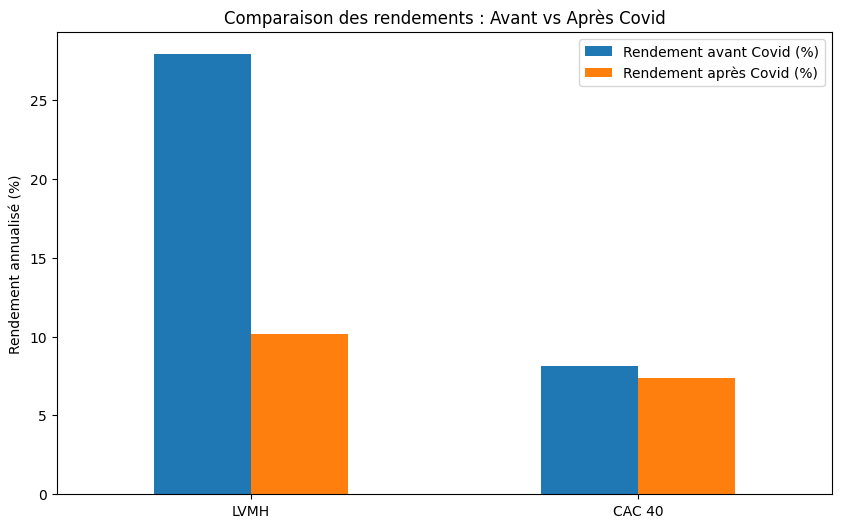

In [42]:
comparatif_covid[[
    "Rendement avant Covid (%)",
    "Rendement après Covid (%)"
]].plot(kind="bar", figsize=(10,6))

plt.title("Comparaison des rendements : Avant vs Après Covid")
plt.ylabel("Rendement annualisé (%)")
plt.xticks(rotation=0)
plt.show()

In [43]:
# Découpage des périodes

avant_covid = returns.loc["2015-01-01":"2019-12-31"]
apres_covid = returns.loc["2021-01-01":]

In [44]:
# Performance cumulée base 1

perf_avant = (1 + avant_covid).cumprod()
perf_apres = (1 + apres_covid).cumprod()

perf_avant.columns = ["LVMH", "CAC 40"]
perf_apres.columns = ["LVMH", "CAC 40"]

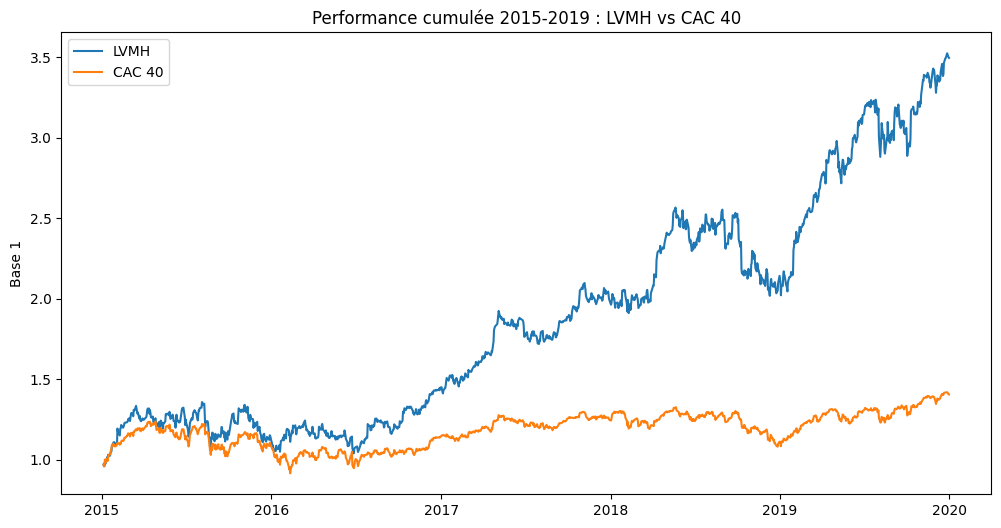

In [45]:
plt.figure(figsize=(12,6))
plt.plot(perf_avant)
plt.title("Performance cumulée 2015-2019 : LVMH vs CAC 40")
plt.ylabel("Base 1")
plt.legend(["LVMH", "CAC 40"])
plt.show()

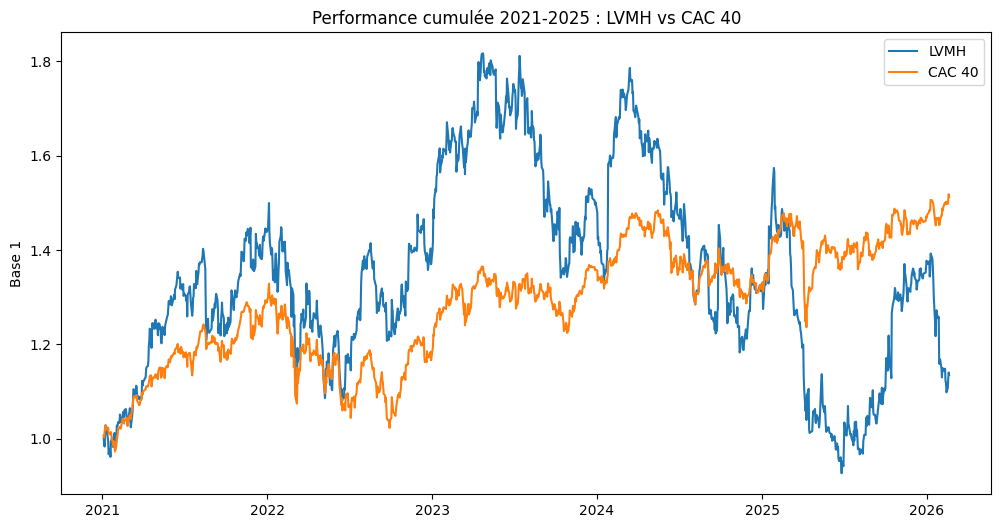

In [46]:
plt.figure(figsize=(12,6))
plt.plot(perf_apres)
plt.title("Performance cumulée 2021-2025 : LVMH vs CAC 40")
plt.ylabel("Base 1")
plt.legend(["LVMH", "CAC 40"])
plt.show()

In [47]:
# Focus sur période Covid
covid_period = returns.loc["2020-01-01":"2021-12-31"]

# Performance cumulée base 1
covid_perf = (1 + covid_period).cumprod()

# Fonction temps de récupération
def recovery_time(series):
    peak = series.cummax()
    drawdown = (series - peak) / peak
    
    # date du plus bas
    trough_date = drawdown.idxmin()
    
    # niveau du pic avant la chute
    peak_value = peak.loc[trough_date]
    
    # chercher quand on revient au niveau du pic
    recovery = series[trough_date:][series >= peak_value]
    
    if len(recovery) > 0:
        recovery_date = recovery.index[0]
        return (recovery_date - trough_date).days
    else:
        return None

recovery_days = covid_perf.apply(recovery_time)

recovery_table = pd.DataFrame({
    "Temps de récupération (jours)": recovery_days
})

recovery_table.index = ["LVMH", "CAC 40"]
recovery_table

,Temps de récupération (jours)
LVMH,232
CAC 40,384


Focus 2022-2023

In [48]:
# Focus 2022-2023 : turbulences inflation / taux

periode_22_23 = returns.loc["2022-01-01":"2023-12-31"]

# Rendement annualisé
annual_22_23 = periode_22_23.mean() * 252

# Volatilité annualisée
vol_22_23 = periode_22_23.std() * np.sqrt(252)

# Ratio de Sharpe (taux sans risque ≈ 0 pour simplifier)
sharpe_22_23 = annual_22_23 / vol_22_23

# Performance cumulée
perf_22_23 = (1 + periode_22_23).cumprod()

# Drawdown
cum_22_23 = perf_22_23
roll_max = cum_22_23.cummax()
drawdown_22_23 = (cum_22_23 - roll_max) / roll_max
max_dd_22_23 = drawdown_22_23.min()

# Tableau récapitulatif
summary_22_23 = pd.DataFrame({
    "Rendement annualisé (%)": annual_22_23 * 100,
    "Volatilité annualisée (%)": vol_22_23 * 100,
    "Max Drawdown (%)": max_dd_22_23 * 100,
    "Ratio de Sharpe": sharpe_22_23,
})

summary_22_23.index = ["LVMH", "CAC 40"]
summary_22_23.round(2)

,Rendement annualisé (%),Volatilité annualisée (%),Max Drawdown (%),Ratio de Sharpe
LVMH,6.53,29.81,-28.02,0.22
CAC 40,4.33,18.57,-23.04,0.23


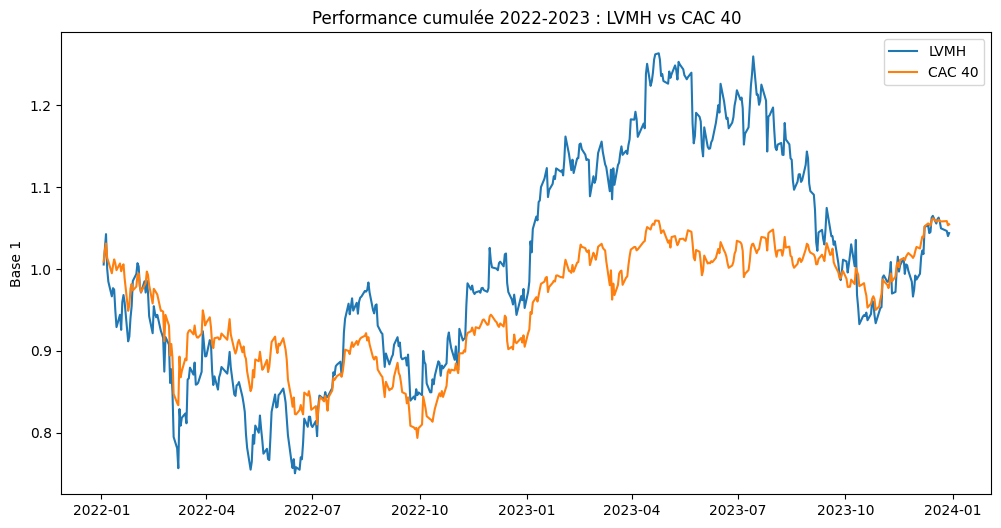

In [49]:
plt.figure(figsize=(12,6))
plt.plot(perf_22_23)
plt.title("Performance cumulée 2022-2023 : LVMH vs CAC 40")
plt.ylabel("Base 1")
plt.legend(["LVMH", "CAC 40"])
plt.show()